## CS3570 Introduction to Multimedia Technology 
### Homework 01    Due: 11:59pm, 3/25/2025


### Reminder

- **You are not allowed to use any function that directly generates the result for each step, except for those provided by us.**
- **Your code must display and output your results to enable us to verify its correctness.**
- **Please follow the instructions in the Jupyter Notebook and complete the parts marked as `"TODO."`**
- **If you encounter any problems or have questions, please post them on eeclass.**
- **Rename your Jupyter Notebook file to `Homework_01_xxxxxxxxx_ooo.ipynb`, where `xxxxxxxxx` is your ID and `ooo` is your name. Ensure you upload it to eeclass before the deadline.**
- **Homework should be submitted before the announced due time. Scores of late homework will be reduced by 20% per day.**


---

## **1. Image Resampling (30%)**
### Implement an image resampling function to **downsample** an image to **1/8th** of its original width and height, then **upsample it back to its original size**. You will apply this to **two different images**, `cat.png` (easier) and `logo.png` (harder), and compare the results.
### (You should not use any built-in function for interpolation.)  

 - (a) Implement **Nearest-neighbor (NN) interpolation** to perform both downsampling and upsampling. Apply this to both `cat.png` and `logo.png`, then display the final restored images. (10%)
 - (b) Implement **Bilinear interpolation** to perform both downsampling and upsampling. Apply this to both `cat.png` and `logo.png`, then display the final restored images. (10%)
 - (c) Compare results from the first and second method. Discuss the differences in image quality and artifacts observed. (10%)


In [1]:
# Install the necessary libraries
# !pip install opencv-python numpy matplotlib

# Import the necessary libraries
import cv2
import numpy as np
import matplotlib.pyplot as plt
    

### Section (a) Nearest Neighbor Interpolation

In [2]:
# Section (a) Nearest-Neighbor Interpolation
def downsample(image, scale=8):
    """Downsamples an image by a given scale factor"""
    h, w, c = image.shape
    new_h, new_w = h // scale, w // scale
    downsampled = np.zeros((new_h, new_w, c), dtype=image.dtype)
    for i in range(new_h):
        for j in range(new_w):
            downsampled[i, j] = image[i * scale, j * scale]
    return downsampled

def upsample_nearest(image, original_shape):
    """Upsamples an image to its original shape using nearest-neighbor interpolation."""
    # TODO
    height, width, channels = original_shape
    downsampled_height, downsampled_width, _ = image.shape
    scale = height // downsampled_height
    
    upsample = np.zeros(original_shape, dtype=image.dtype)
    
    for i in range(height):
        for j in range(width):
            src_i = min(int(i / scale), downsampled_height -1)
            src_j = min(int(j / scale), downsampled_width -1)
            upsample[i, j] = image[src_i, src_j]
    return upsample
    pass


### Section (b) Bilinear Interpolation

In [3]:
def upsample_bilinear(image, original_shape):
    """Upsamples an image to its original shape using bilinear interpolation."""
    # TODO
    height, width, channels = original_shape
    down_h, down_w, _ = image.shape

    upsampled = np.zeros(original_shape, dtype=image.dtype)
    
    for i in range(height):
        for j in range(width):
            y = (i * (down_h - 1)) / (height - 1) 
            x = (j * (down_w - 1)) / (width - 1)
            
            y0 = int(np.floor(y))
            x0 = int(np.floor(x))
            y1 = min(y0 + 1, down_h - 1)
            x1 = min(x0 + 1, down_w - 1)
            
            dy = y - y0
            dx = x - x0
            
            for c in range(channels):
                upsampled[i, j, c] = (
                    image[y0, x0, c] * (1 - dx) * (1 - dy) +
                    image[y0, x1, c] * dx * (1 - dy) +
                    image[y1, x0, c] * (1 - dx) * dy +
                    image[y1, x1, c] * dx * dy
                )
    upsampled_with_border = np.pad(upsampled, ((0, 7), (0, 0), (0, 0)), mode='edge')
    return upsampled_with_border

### Section (c) :
  > 首先對於cat的圖片，可以很清楚地看到透過NN interpolation處理的圖片，比起Bilinear interpolation處理的圖片品質更加糟糕。可以在NN interpolation處理的圖片上看到明顯的鋸齒狀邊緣，而Bilinear則不會那麼明顯，顯示Bilinear在這個case中是更平滑更好的做法
  > 接著對於logo的圖片，NN interpolation一樣比起Bilinear有更明顯的鋸齒邊緣；但可以發現因為Bilinear的平滑處理，造成更多的模糊感
  > 透過在程式碼增加輸出的方式，可以發現NN interpolation有更快的速度，但犧牲的是品質；而Bilinear則需要非常大量的時間，但可以換得更平滑的圖片。

### Visualize

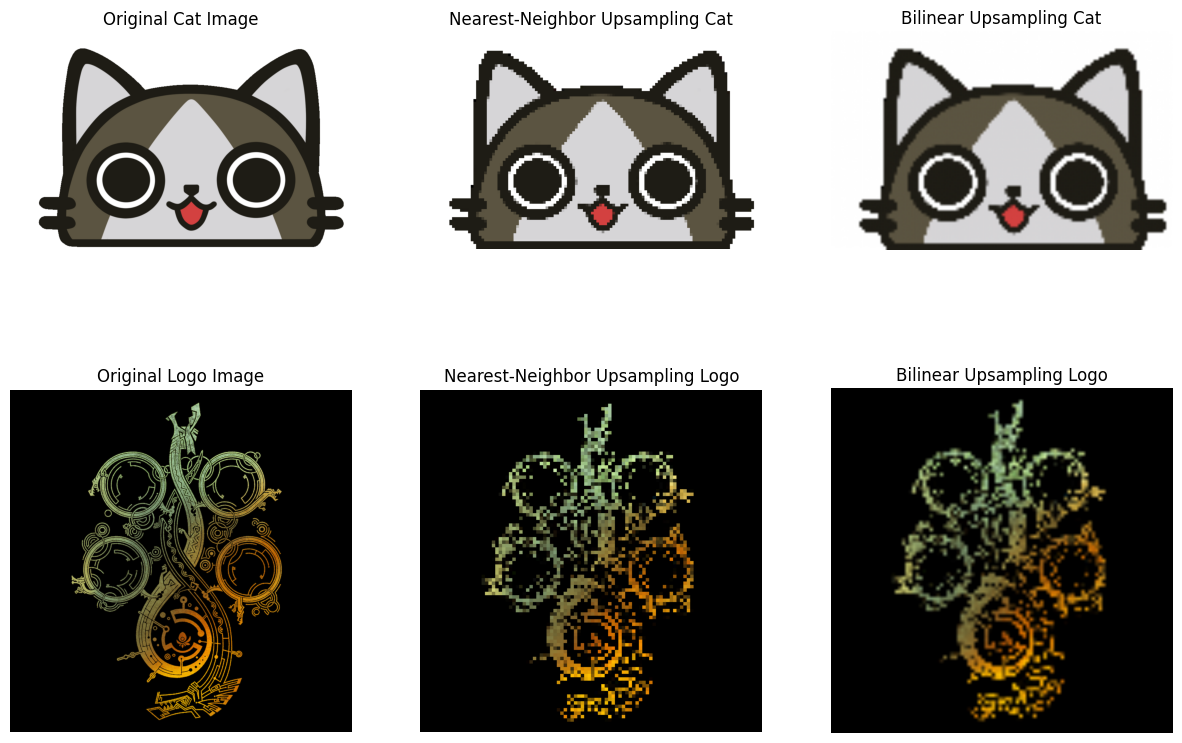

In [4]:
# Load an image
image_cat = cv2.imread('cat.png')
image_cat = cv2.cvtColor(image_cat, cv2.COLOR_BGR2RGB)  # Convert to RGB format
image_logo = cv2.imread('logo.png')
image_logo = cv2.cvtColor(image_logo, cv2.COLOR_BGR2RGB)  # Convert to RGB format


downsampled_image_cat = downsample(image_cat)
upsampled_nn_image_cat = upsample_nearest(downsampled_image_cat, image_cat.shape)
upsampled_bilinear_image_cat = upsample_bilinear(downsampled_image_cat, image_cat.shape)
downsampled_image_logo = downsample(image_logo)
upsampled_nn_image_logo = upsample_nearest(downsampled_image_logo, image_logo.shape)
upsampled_bilinear_image_logo = upsample_bilinear(downsampled_image_logo, image_logo.shape)

# Show results
fig, axs = plt.subplots(2, 3, figsize=(15, 10))
axs[0, 0].imshow(image_cat)
axs[0, 0].set_title("Original Cat Image")
axs[0, 0].axis("off")

axs[0, 1].imshow(upsampled_nn_image_cat)
axs[0, 1].set_title("Nearest-Neighbor Upsampling Cat")
axs[0, 1].axis("off")

axs[0, 2].imshow(upsampled_bilinear_image_cat)
axs[0, 2].set_title("Bilinear Upsampling Cat")
axs[0, 2].axis("off")

axs[1, 0].imshow(image_logo)
axs[1, 0].set_title("Original Logo Image")
axs[1, 0].axis("off")

axs[1, 1].imshow(upsampled_nn_image_logo)
axs[1, 1].set_title("Nearest-Neighbor Upsampling Logo")
axs[1, 1].axis("off")

axs[1, 2].imshow(upsampled_bilinear_image_logo)
axs[1, 2].set_title("Bilinear Upsampling Logo")
axs[1, 2].axis("off")

plt.show()

## **2. Photo Enhancement (30%)**

### You are required to enhance the image **"scene_dark.jpg"** by following these steps.  
### Do not use any built-in functions to perform the enhancement procedure.

 - (a) Convert the image from **RGB color space to YIQ** and display the histogram of the **Y channel**. (10%)
 - (b) Apply **Gamma Transform** to the Y channel using an appropriate gamma value. (5%)
 - (c) Convert the modified image back from **YIQ to RGB**, and display the enhanced image along with the histogram of the Y channel. (5%)
 - (d) Compare the original and enhanced images along with their histograms. Discuss your observations regarding the differences and improvements. (10%)


### Section (a) Color space convertion

In [5]:
# RGB to YIQ
def rgb_to_yiq(image):
    # TODO
    image_float = image.astype(np.float32) / 255.0
    transform = np.array([[0.299,  0.587,  0.114],
                          [0.596, -0.274, -0.322],
                          [0.211, -0.523,  0.312]])
    
    shape = image.shape
    yiq = np.dot(image_float.reshape(-1, 3), transform.T)
    yiq = yiq.reshape(shape)
    yiq[..., 0] = yiq[..., 0] * 255.0
    return yiq
    pass

# Load the dark image
dark_image = cv2.imread("scene_dark.jpg")
dark_image = cv2.cvtColor(dark_image, cv2.COLOR_BGR2RGB)

# Step (a): Convert RGB to YIQ
yiQ_img = rgb_to_yiq(dark_image)

### Section (b) Gamma Transformation

In [6]:
# Gamma Transformation
def gamma_transform(image, gamma):
    # TODO
    transformed = image.copy()
    height, width, _ = image.shape
    for i in range(height):
        for j in range(width):
            y_val = transformed[i, j, 0]
            y_norm = y_val / 255.0
            y_gamma = y_norm ** gamma
            transformed[i, j, 0] = y_gamma * 255.0
    # transformed[..., 0] = transformed[..., 0] * 255.0
    return transformed
    pass

gamma = 0.3     # Choose an appropriate gamma value
yiQ_gamma_img = gamma_transform(yiQ_img.copy(), gamma)

### Section (c) Modified YIQ to RGB

In [132]:
# YIQ to RGB
def yiq_to_rgb(image):
    # TODO
    image_float = image.astype(np.float32)
    transform = np.array([[1.0,  0.956,  0.621],
                          [1.0, -0.272, -0.647],
                          [1.0, -1.106,  1.703]])
    Y = image_float[..., 0] / 255.0
    I = image_float[..., 1]
    Q = image_float[..., 2]
    yip_norm = np.stack([Y, I, Q], axis=-1)
    shape = yip_norm.shape
    shape = image.shape
    rgb = np.dot(yip_norm.reshape(-1, 3), transform.T)
    rgb = rgb.reshape(shape)
    return rgb
    pass

enhanced_img = yiq_to_rgb(yiQ_gamma_img)

### Section (d) :
  > 很明顯的，透過gmma transform後的照片更加明亮了，gmma值越小，則處理後的照片更亮，因此能觀察到照片更多的細節。比如處理前看不太清楚右下角的草叢，處理後則能清楚看到一根根的葉子
  > 另外，當gmma值越小，照片越亮，intensity也會逐漸右移；反之若gmma越小，intensity則會左移。

### Visualize

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers). Got range [0.0..1.1706511566417757].


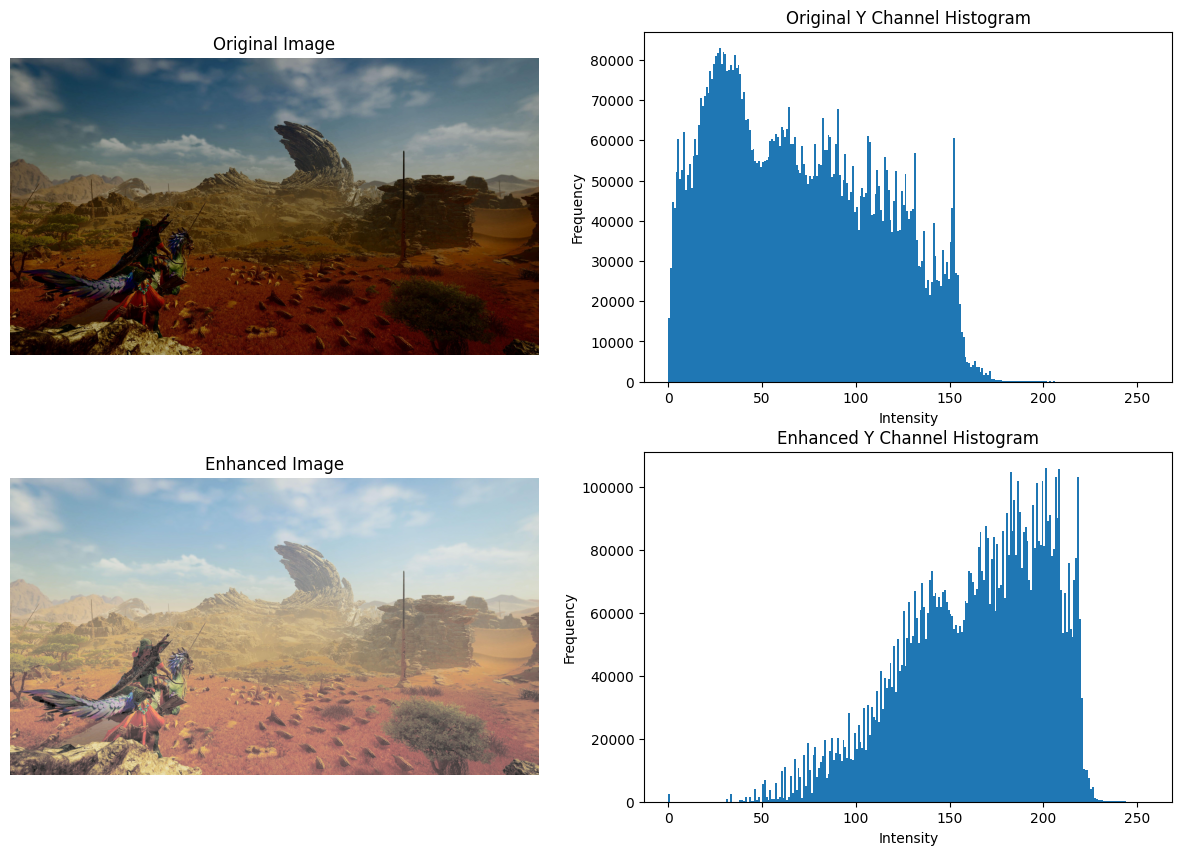

In [133]:
# Display results
fig, axs = plt.subplots(2, 2, figsize=(15, 10))

axs[0, 0].imshow(dark_image)
axs[0, 0].set_title("Original Image")
axs[0, 0].axis("off")

axs[0, 1].hist(yiQ_img[..., 0].ravel(), bins=256, range=(0, 256))
axs[0, 1].set_title("Original Y Channel Histogram")
axs[0, 1].set_xlabel("Intensity")
axs[0, 1].set_ylabel("Frequency")

axs[1, 0].imshow(enhanced_img)
axs[1, 0].set_title("Enhanced Image")
axs[1, 0].axis("off")

axs[1, 1].hist(yiQ_gamma_img[..., 0].ravel(), bins=256, range=(0, 256))
axs[1, 1].set_title("Enhanced Y Channel Histogram")
axs[1, 1].set_xlabel("Intensity")
axs[1, 1].set_ylabel("Frequency")

plt.show()

## **3. Color Quantization and Dithering (40%)**  
### Implement the following steps to **reduce the number of colors in an image** using **median-cut color quantization** and **error diffusion dithering**.
### (**You cannot use built-in functions for these procedures** except for basic image input/output.)

 - (a) Implement **median-cut color quantization** to reduce the color depth of the input image to **5-bit (32 colors)**. Display the output images for both cases. (15%)
 - (b) Apply **error diffusion dithering** to the quantized images to **reduce color banding artifacts**. Display the dithered output images.  (15%)
 - (c) Visually analyze the results before and after dithering. Compare the images in terms of **color accuracy, smoothness, and introduced artifacts**. Discuss how dithering affects perceptual quality and whether it improves or degrades the image. Use observations from the images themselves rather than numerical metrics. (10%)

### Section (a) Median-Cut Color Quantization

In [142]:
# Median-cut color quantization
def median_cut_quantize(img, depth):
    # TODO
    pixels = img.reshape(-1, 3)
    N = pixels.shape[0]
    boxes = [np.arange(N)]
    
    for i in range(depth):
        new_boxes = []
        for box_indices in boxes:
            if(len(box_indices) == 0):
                continue
            box_pixels = pixels[box_indices]
            r_min, g_min, b_min = np.min(box_pixels, axis=0)
            r_max, g_max, b_max = np.max(box_pixels, axis=0)
            
            r_range = r_max - r_min
            g_range = g_max - g_min
            b_range = b_max - b_min
            
            if(r_range >= g_range and r_range >= b_range): channel = 0
            elif(g_range >= r_range and g_range >= b_range): channel = 1
            else: channel = 2
            
            sorted_indices = box_indices[np.argsort(box_pixels[:, channel])]
            median_index = len(sorted_indices) // 2
            box1 = sorted_indices[:median_index]
            box2 = sorted_indices[median_index:]
            new_boxes.extend([box1, box2])
        boxes = new_boxes
    
    quntized_pixels = np.zeros_like(pixels)
    for box in boxes:
        if(len(box) == 0):
            continue
        mean_color = np.mean(pixels[box], axis=0)
        quntized_pixels[box] = np.round(mean_color).astype(np.uint8)
    quantized_img = quntized_pixels.reshape(img.shape)
    return quantized_img
    pass

### Section (b) Error Diffusion Dithering

In [166]:
# Error diffusion dithering
def error_diffusion_dither(img, palette):
    # TODO
    dithered = img.astype(np.float32).copy()
    height, width, _ = dithered.shape
    palette = np.array(palette, dtype=np.float32)
    strength = 2
    for y in range(height):
        for x in range(width):
            old_pixel = dithered[y, x]
            diffs = palette - old_pixel
            distances = np.sum(diffs ** 2, axis=1)
            closest_color_idx = np.argmin(distances)
            new_pixel = palette[closest_color_idx]
            dithered[y, x] = new_pixel
            quant_error = (old_pixel - new_pixel) * strength
            if x < width - 1:
                dithered[y, x + 1] += quant_error * 7 / 16
            if y < height - 1:
                if x > 0:
                    dithered[y + 1, x - 1] += quant_error * 3 / 16
                dithered[y + 1, x] += quant_error * 5 / 16
                if x < width - 1:
                    dithered[y + 1, x + 1] += quant_error * 1 / 16
    dithered = np.clip(dithered, 0, 255).astype(np.uint8)
    return dithered
    pass

### Section (c) :
  > Color accuracy : 與原始照片相比，經過 Median-Cut Color Quantization 後色彩的豐富度大幅下降。比如在原始照片中我們可以看到房屋處都有一些紅色，但在經過Quantization後，因為顏色被限縮且紅色所佔區域本來就比較少，所以在處理後的照片中可以發現紅色非常少出現，幾乎被抹掉了。而在經過Dithering後，由於引入了周遭的顏色，可以發現地面街道的光線相比只經過quntization的照片更加明亮豐富。

  > Smoothness : 經過 quantization 後，由於顏色被限縮，可用的顏色減少，可以看到不同顏色之間出現明顯的分界，比如天空，在原始照片裡深藍跟普通藍幾乎是揉和在一起的，但在Quantization後可以看到深藍跟普通藍的明顯分界，且在分界出也出現了比較方塊破碎的色塊。繼續經過 Dithering 後，我們可以看到天空又回到接近原始照片那樣，色層之間分界比較不明顯的樣子，因為在dithering的過程把自己的數值分送給了周遭的數值，減少了顏色分層的情形。

  > Introduced Artifacts : 由於色彩數量減少，在quantization後出現了明顯的artifacts，比如天空中的明顯色帶或在地平線上的燈光渲染到了天空；而在Dithering後則是產生了顆粒感，放大來看會發現Dithering的結果會比加粒粒分明。
  
  > Perceptual Quality, pros and cons : 透過Dithering引入周遭的pixel value，能夠有效減少色帶的產生（比如天空不同深淺的藍色），讓圖像看起來有更多層次、更多顏色；缺點則在於會帶來顆粒感，會顯得太過生動而不自然。

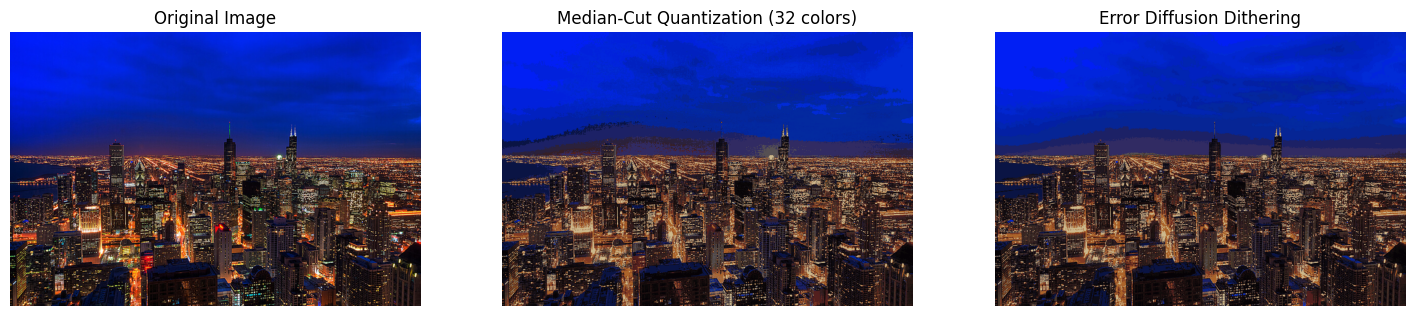

In [169]:
image = cv2.imread('cityscape.jpg')
image = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)

# (a) Median-cut quantization to 32 colors (5-bit)
quantized_img = median_cut_quantize(image, depth=5)

# (b) Error diffusion dithering on quantized image
palette = np.unique(quantized_img.reshape(-1, 3), axis=0)
dithered_img = error_diffusion_dither(image, palette)

# Display results
fig, axes = plt.subplots(1, 3, figsize=(18, 8))

axes[0].imshow(image)
axes[0].set_title('Original Image')
axes[0].axis('off')

axes[1].imshow(quantized_img)
axes[1].set_title('Median-Cut Quantization (32 colors)')
axes[1].axis('off')

axes[2].imshow(dithered_img)
axes[2].set_title('Error Diffusion Dithering')
axes[2].axis('off')

plt.show()
